<a href="https://colab.research.google.com/github/shivams289/Projects/blob/main/Quantile_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Paper:http://www.economics-ejournal.org/economics/journalarticles/2019-26/
#he dataset for the same is available at - http://dx.doi.org/10.7910/DVN/MCOVPQ

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [ ]:
plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataverse_files/quantile_raw.csv')

In [ ]:
#The shape is different than used in research paper for visualising the summar statistics
df.shape

(821788, 21)

In [ ]:
df.dtypes

t              object
k200          float64
k200volume    float64
k200_wn       float64
fprc          float64
fvolume       float64
f_wn          float64
vkospi        float64
iv1           float64
iv2           float64
iv2_Call      float64
iv2_put       float64
iv2_itm       float64
iv2_atm       float64
iv2_otm       float64
iv3           float64
iv3_Call      float64
iv3_put       float64
iv3_itm       float64
iv3_atm       float64
iv3_otm       float64
dtype: object

In [ ]:
df.head()

,t,k200,k200volume,k200_wn,fprc,fvolume,f_wn,vkospi,iv1,iv2,iv2_Call,iv2_put,iv2_itm,iv2_atm,iv2_otm,iv3,iv3_Call,iv3_put,iv3_itm,iv3_atm,iv3_otm
0,2005-01-03 10:01,115.65,6971224.0,8.813920e+10,116.00,2658.0,1.540000e+11,NaN,20.879310,28.419010,20.265149,35.895286,19.621235,19.726609,29.636174,24.784842,19.833360,28.415928,21.272830,20.700473,26.536521
1,2005-01-03 10:02,115.54,915131.0,9.772912e+09,116.00,1486.0,8.618300e+10,NaN,21.112680,23.072276,21.082338,28.444816,21.072528,20.301699,23.799501,24.683726,20.555183,27.986560,21.365015,20.928948,26.464211
2,2005-01-03 10:03,115.42,771750.0,9.474952e+09,116.00,1214.0,7.039850e+10,NaN,21.336045,22.517448,21.587777,25.139568,22.057481,21.043458,22.964765,23.515884,21.098337,26.537817,21.543264,21.079843,25.045842
3,2005-01-03 10:04,115.55,991206.0,9.716512e+09,116.05,1876.0,1.090000e+11,NaN,20.977045,21.688313,20.468253,24.008019,20.709042,20.463135,22.800739,24.261755,20.575309,27.640997,21.749790,20.930062,25.341208
4,2005-01-03 10:05,115.60,1053666.0,1.272223e+10,115.80,2064.0,1.200000e+11,NaN,20.863665,22.366039,19.995091,26.196032,17.096130,19.634384,23.386053,24.308382,19.610685,27.538049,21.211115,21.128049,25.889319


In [ ]:
df['Dates'] = pd.to_datetime(df['t']).dt.date
df['Time'] = pd.to_datetime(df['t']).dt.time

In [ ]:
#set(df['Time'])

In [ ]:
#Lets check if we have null values
df.isnull().sum()


t                  0
k200             289
k200volume       289
k200_wn          289
fprc             289
fvolume          289
f_wn             289
vkospi        391461
iv1                0
iv2                0
iv2_Call           0
iv2_put            0
iv2_itm        78801
iv2_atm           26
iv2_otm            1
iv3                0
iv3_Call           0
iv3_put            0
iv3_itm        78801
iv3_atm           26
iv3_otm            1
Dates              0
Time               0
dtype: int64

In [ ]:
#df

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
#Here we are extracting data which is needed, although paper says 'KOSPI Volume' but after checking summary statics it came out that the summary 
#statistics didn't match volumne rather matched when using weight avg. of price*vol

dff = df[['Dates','Time', 'k200', 'k200_wn','f_wn', 'iv2' ]]

In [ ]:
t_T = [i/len(dff) for i in range(1,len(dff)+1)]

In [ ]:
#We will need this to control time trend
print(len(t_T))

print(len(dff))

821788
821788


In [ ]:
dff['t_T'] = t_T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dff.isnull().sum()

Dates        0
Time         0
k200       289
k200_wn    289
f_wn       289
iv2          0
t_T          0
dtype: int64

In [ ]:
#Drop the Nan's
dff.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dff.isnull().sum()

Dates      0
Time       0
k200       0
k200_wn    0
f_wn       0
iv2        0
t_T        0
dtype: int64

In [ ]:
dff

,Dates,Time,k200,k200_wn,f_wn,iv2,t_T
0,2005-01-03,10:01:00,115.65,8.813920e+10,1.540000e+11,28.419010,0.000001
1,2005-01-03,10:02:00,115.54,9.772912e+09,8.618300e+10,23.072276,0.000002
2,2005-01-03,10:03:00,115.42,9.474952e+09,7.039850e+10,22.517448,0.000004
3,2005-01-03,10:04:00,115.55,9.716512e+09,1.090000e+11,21.688313,0.000005
4,2005-01-03,10:05:00,115.60,1.272223e+10,1.200000e+11,22.366039,0.000006
...,...,...,...,...,...,...,...
821783,2014-06-30,14:45:00,259.74,1.211954e+10,4.592970e+10,12.104030,0.999995
821784,2014-06-30,14:46:00,259.80,1.332567e+10,5.259748e+10,12.797122,0.999996
821785,2014-06-30,14:47:00,259.84,1.073104e+10,1.161628e+10,11.988567,0.999998
821786,2014-06-30,14:48:00,259.79,1.404962e+10,3.184825e+10,11.674133,0.999999


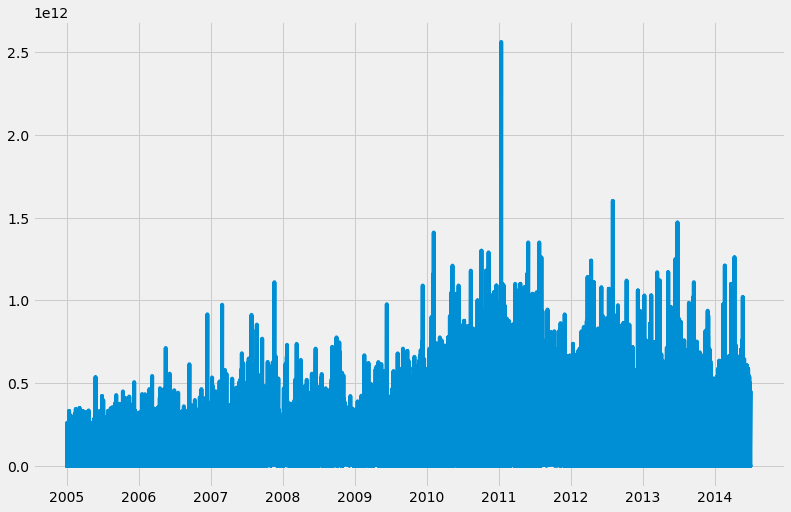

In [ ]:
plt.plot(dff['Dates'], dff['f_wn'])

In [ ]:
#Creating the independent variables as described in the paper

dff['r'] = (dff['k200'].shift(-1) - dff['k200'])/dff['k200'] *100 #Percentage return

dff['lsv'] = np.log(dff['k200_wn']) #natural log of ..
dff['lfv'] = np.log(dff['f_wn'])    #natural log of...

dff['div'] = (dff['iv2'].shift(-1) - dff['iv2']) #1st difference of implied volatality

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/

In [ ]:
#Make infinite values Nan and remove it finally

dff.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
dff_check = dff.dropna(axis = 0)
dff_check

,Dates,Time,k200,k200_wn,f_wn,iv2,t_T,r,lsv,lfv,div
0,2005-01-03,10:01:00,115.65,8.813920e+10,1.540000e+11,28.419010,0.000001,-0.095115,25.202183,25.760218,-5.346735
1,2005-01-03,10:02:00,115.54,9.772912e+09,8.618300e+10,23.072276,0.000002,-0.103860,23.002880,25.179739,-0.554828
2,2005-01-03,10:03:00,115.42,9.474952e+09,7.039850e+10,22.517448,0.000004,0.112632,22.971918,24.977438,-0.829135
3,2005-01-03,10:04:00,115.55,9.716512e+09,1.090000e+11,21.688313,0.000005,0.043271,22.997093,25.414614,0.677726
4,2005-01-03,10:05:00,115.60,1.272223e+10,1.200000e+11,22.366039,0.000006,-0.242215,23.266617,25.510758,0.328027
...,...,...,...,...,...,...,...,...,...,...,...
821782,2014-06-30,14:44:00,259.63,1.235064e+10,7.961225e+09,12.020005,0.999994,0.042368,23.236974,22.797849,0.084025
821783,2014-06-30,14:45:00,259.74,1.211954e+10,4.592970e+10,12.104030,0.999995,0.023100,23.218085,24.550378,0.693092
821784,2014-06-30,14:46:00,259.80,1.332567e+10,5.259748e+10,12.797122,0.999996,0.015396,23.312958,24.685934,-0.808555
821785,2014-06-30,14:47:00,259.84,1.073104e+10,1.161628e+10,11.988567,0.999998,-0.019243,23.096407,23.175673,-0.314433


In [ ]:

df_final = dff_check[['r', 'lsv', 'lfv', 'div', 't_T']]

In [ ]:
quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.9, 0.99]

In [ ]:
#Summary Statistics

df_final.describe(percentiles=quantiles)

,r,lsv,lfv,div,t_T
count,821496.000000,821496.000000,821496.000000,821496.000000,821496.000000
mean,0.000127,22.837721,24.444221,-0.000026,0.500060
std,0.075222,0.599241,1.150049,1.633906,0.288655
min,-6.522082,19.940613,17.854607,-34.178617,0.000001
1%,-0.159263,21.424481,20.760871,-4.684548,0.010007
5%,-0.074765,21.886018,22.293440,-2.372332,0.050054
10%,-0.051925,22.099649,23.032647,-1.569083,0.100067
25%,-0.024831,22.436200,23.870779,-0.651497,0.250091
50%,0.000000,22.825376,24.587061,-0.006164,0.500126
75%,0.024709,23.234009,25.203068,0.643788,0.750038


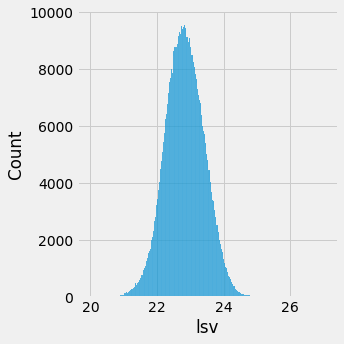

In [ ]:
#Distribution of lsv
sns.displot(data = df_final['lsv'])

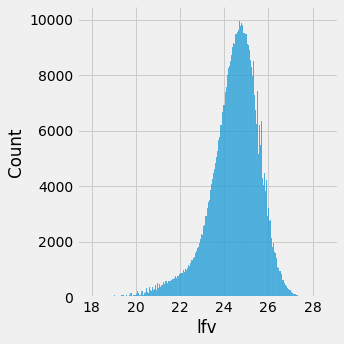

In [ ]:
#Distribution suggesting negative skewness even after using log transformation
sns.displot(data= df_final['lfv'])

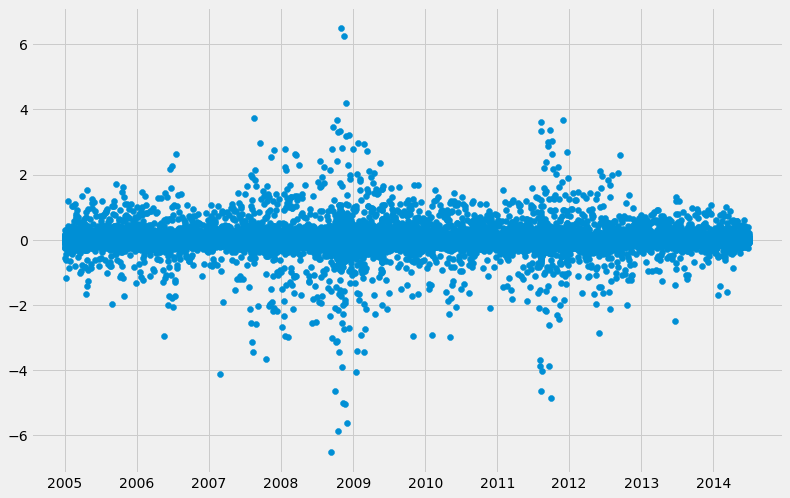

In [ ]:
plt.scatter(x= dff_check['Dates'], y= df_final['r'])


In [ ]:
# Timings of peak morning and afternoon sessions
from datetime import time
start1 = time(9,0) 
end1 = time(10,0) 
start2 = time(13,50) 
end2 = time(14,50)

In [ ]:
#Dummy var to induce effect of morning and afternoon peak timing

DOP_t = dff_check['Time'].apply(lambda x:1 if x>=start1 and x<end1 else 0) 
DCL_t = dff_check['Time'].apply(lambda x:1 if x>=start2 and x<end2 else 0)


In [ ]:
print(len(DOP_t))
print(len(DCL_t))
print(len(df_final))

821496
821496
821496


In [ ]:
#Adding dummy to our dataframe

df_final['DOP_t'] = DOP_t
df_final['DCL_t'] = DCL_t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
len(df_final)

821496

In [ ]:
# Variable that will be same for All Models

rt_1 = df_final['r'].shift(1)
rt_2 = df_final['r'].shift(2)
rt_3 = df_final['r'].shift(3)



In [ ]:
#Varibales to be fed into implied volatality model
divt_1 = df_final['div'].shift(1)
divt_2 = df_final['div'].shift(2)
divt_3 = df_final['div'].shift(3)

In [ ]:
df_final['divt_1'] = divt_1
df_final['divt_2'] = divt_2
df_final['divt_3'] = divt_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
len(divt_1)

821496

In [ ]:
#Adding the variables to our final dataframe

df_final['rt_1'] = rt_1
df_final['rt_2'] = rt_2
df_final['rt_3'] = rt_3

In [ ]:
#To be needed for Model A in Panel A of paper
lsvt_1 = df_final['lsv'].shift(1)
lsvt_2 = df_final['lsv'].shift(2)
lsvt_3 = df_final['lsv'].shift(3)

#To be needed for Model B in Panel B of paper
lfvt_1 = df_final['lfv'].shift(1)
lfvt_2 = df_final['lfv'].shift(2)
lfvt_3 = df_final['lfv'].shift(3)

#To be needed for Model C in Panel C of paper
fst_1 = lfvt_1 - lsvt_1
fst_2 = lfvt_2 - lsvt_2
fst_3 = lfvt_3 - lsvt_3



In [ ]:
#Model A
df_final['lsvt_1'] = lsvt_1
df_final['lsvt_2'] = lsvt_2
df_final['lsvt_3'] = lsvt_3

#Model B
df_final['lfvt_1'] = lfvt_1
df_final['lfvt_2'] = lfvt_2
df_final['lfvt_3'] = lfvt_3

#Model C
df_final['fst_1'] = fst_1
df_final['fst_2'] = fst_2
df_final['fst_3'] = fst_3

In [ ]:
df_final

,r,lsv,lfv,div,t_T,DOP_t,DCL_t,divt_1,divt_2,divt_3,rt_1,rt_2,rt_3,lsvt_1,lsvt_2,lsvt_3,lfvt_1,lfvt_2,lfvt_3,fst_1,fst_2,fst_3
0,-0.095115,25.202183,25.760218,-5.346735,0.000001,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.103860,23.002880,25.179739,-0.554828,0.000002,0,0,-5.346735,NaN,NaN,-0.095115,NaN,NaN,25.202183,NaN,NaN,25.760218,NaN,NaN,0.558035,NaN,NaN
2,0.112632,22.971918,24.977438,-0.829135,0.000004,0,0,-0.554828,-5.346735,NaN,-0.103860,-0.095115,NaN,23.002880,25.202183,NaN,25.179739,25.760218,NaN,2.176858,0.558035,NaN
3,0.043271,22.997093,25.414614,0.677726,0.000005,0,0,-0.829135,-0.554828,-5.346735,0.112632,-0.103860,-0.095115,22.971918,23.002880,25.202183,24.977438,25.179739,25.760218,2.005520,2.176858,0.558035
4,-0.242215,23.266617,25.510758,0.328027,0.000006,0,0,0.677726,-0.829135,-0.554828,0.043271,0.112632,-0.103860,22.997093,22.971918,23.002880,25.414614,24.977438,25.179739,2.417521,2.005520,2.176858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821782,0.042368,23.236974,22.797849,0.084025,0.999994,0,1,-2.614973,0.364954,2.170220,-0.023104,-0.023099,0.057781,23.184001,23.050166,23.123372,23.970280,24.232121,23.891086,0.786279,1.181955,0.767714
821783,0.023100,23.218085,24.550378,0.693092,0.999995,0,1,0.084025,-2.614973,0.364954,0.042368,-0.023104,-0.023099,23.236974,23.184001,23.050166,22.797849,23.970280,24.232121,-0.439125,0.786279,1.181955
821784,0.015396,23.312958,24.685934,-0.808555,0.999996,0,1,0.693092,0.084025,-2.614973,0.023100,0.042368,-0.023104,23.218085,23.236974,23.184001,24.550378,22.797849,23.970280,1.332293,-0.439125,0.786279
821785,-0.019243,23.096407,23.175673,-0.314433,0.999998,0,1,-0.808555,0.693092,0.084025,0.015396,0.023100,0.042368,23.312958,23.218085,23.236974,24.685934,24.550378,22.797849,1.372976,1.332293,-0.439125


In [ ]:
df_final.dropna(axis = 0, inplace=True)

In [ ]:
len(df_final)

821493

In [ ]:
df_final['t_T_s'] = df_final['t_T']**2

df_final['rt_1_s'] = df_final['rt_1']**2
df_final['rt_2_s'] = df_final['rt_2']**2
df_final['rt_3_s'] = df_final['rt_3']**2

In [ ]:
df_final.reset_index(inplace=True)

In [ ]:
df_final.columns

Index(['index', 'r', 'lsv', 'lfv', 'div', 't_T', 'DOP_t', 'DCL_t', 'divt_1',
       'divt_2', 'divt_3', 'rt_1', 'rt_2', 'rt_3', 'lsvt_1', 'lsvt_2',
       'lsvt_3', 'lfvt_1', 'lfvt_2', 'lfvt_3', 'fst_1', 'fst_2', 'fst_3',
       't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s'],
      dtype='object')

In [ ]:
data_A = df_final[['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lsvt_1',
       'lsvt_2', 'lsvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']]

data_B = df_final[['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lfvt_1', 
       'lfvt_2', 'lfvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']]

data_C = df_final[['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'fst_1',
       'fst_2', 'fst_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']]

In [ ]:
#For divt vs other independent varibales

data_D = df_final[['div', 'DOP_t', 'DCL_t', 't_T', 'divt_1', 'divt_2', 'divt_3', 'lsvt_1',
       'lsvt_2', 'lsvt_3', 't_T_s']]

data_E = df_final[['div', 'DOP_t', 'DCL_t', 't_T', 'divt_1', 'divt_2', 'divt_3', 'lfvt_1', 
       'lfvt_2', 'lfvt_3', 't_T_s']]

data_F = df_final[['div', 'DOP_t', 'DCL_t', 't_T', 'divt_1', 'divt_2', 'divt_3', 'fst_1',
       'fst_2', 'fst_3', 't_T_s']]

In [ ]:
len(data_A)

821493

In [ ]:
quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.9, 0.99]

In [ ]:
data_A.columns

Index(['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lsvt_1',
       'lsvt_2', 'lsvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s'],
      dtype='object')

In [ ]:
targ_col_r = ['r'] #target col for the return models

feat_col_A = ['DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lsvt_1',
       'lsvt_2', 'lsvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']

feat_col_B = ['DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lfvt_1',
       'lfvt_2', 'lfvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']

feat_col_C = ['DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'fst_1',
       'fst_2', 'fst_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']


targ_col_div = ['div'] #dependent var in implied volatality model

feat_col_D = ['DOP_t', 'DCL_t', 't_T', 'divt_1', 'divt_2', 'divt_3', 'lsvt_1',
       'lsvt_2', 'lsvt_3', 't_T_s']

feat_col_E = ['DOP_t', 'DCL_t', 't_T', 'divt_1', 'divt_2', 'divt_3', 'lfvt_1', 
       'lfvt_2', 'lfvt_3', 't_T_s']

feat_col_F = ['DOP_t', 'DCL_t', 't_T', 'divt_1', 'divt_2', 'divt_3', 'fst_1',
       'fst_2', 'fst_3', 't_T_s']

#PART - B AND PART - C

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#both target cols
targ_both = ['r', 'div']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final, df_final[targ_both], test_size=0.5, random_state=42)

In [ ]:
#First let's do it with linear regression for comparision purpose
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train[feat_col_A], y_train[targ_col_r])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linpreds = linreg.predict(X_test[feat_col_A])

Text(0.5, 1.0, 'True Values')

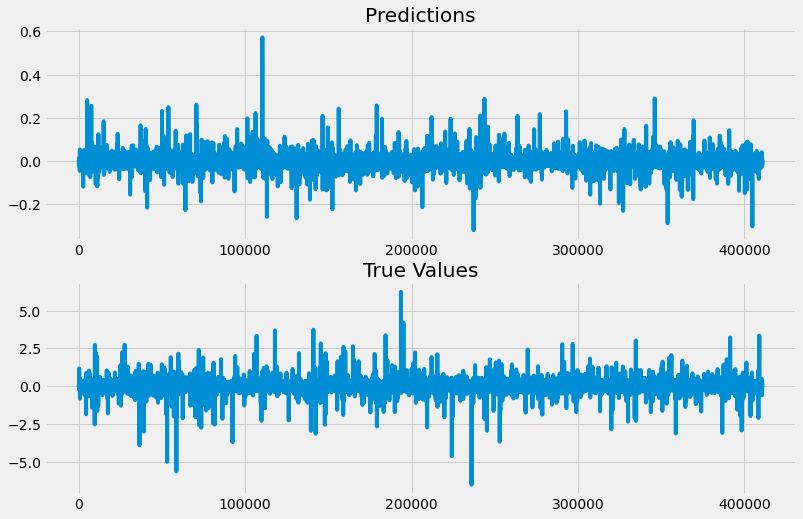

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
ax1.plot(linpreds, label = 'Predicted r')
ax2.plot(y_test[targ_col_r].values, label = 'True r')
ax1.set_title('Predictions')
ax2.set_title('True Values')


In [ ]:
#WE ARE PRINTING 2 TYPES OF SCORES HERE
print('MAE:',mean_absolute_error(y_test[targ_col_r], linpreds))
print('MSE:',mean_squared_error(y_test[targ_col_r], linpreds))


MAE: 0.037268954444225635
MSE: 0.005664652289284591


In [ ]:
#NOW WE HAVE SEEN HOW LINEAR REGRESSION PERFORMED LET'S SEE HOW OUR QUANTILE REGRESSION GIVEN DIFFERENT QUANTILES PERFORMS

import statsmodels.api as sm
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from statsmodels.regression.quantile_regression import QuantReg

In [ ]:
#sm.tools.tools.add_constant because this model requres a feature having 1 as constant values

model = QuantReg(endog = y_train[targ_col_r].values, exog = sm.tools.tools.add_constant(X_train[feat_col_A].values))

In [ ]:
Score_dict ={ 'Quantile':[], 'MAE':[], 'MSE':[]}

In [ ]:
for q in quantiles:
  result = model.fit(q=q)
  preds = result.predict(sm.tools.tools.add_constant(X_test[feat_col_A].values))
  mse = mean_squared_error(y_test[targ_col_r], preds)
  mae = mean_absolute_error(y_test[targ_col_r], preds)
  Score_dict['Quantile'].append(q)
  Score_dict['MAE'].append(mae)
  Score_dict['MSE'].append(mse)

Score_df = pd.DataFrame(Score_dict)

In [ ]:
#here we can see that we get variation in scores w.r.t quantiles
Score_df

,Quantile,MAE,MSE
0,0.01,0.148221,0.090158
1,0.05,0.082433,0.022013
2,0.10,0.063068,0.010163
3,0.25,0.044136,0.006472
4,0.50,0.037157,0.005683
5,0.75,0.043841,0.006371
6,0.95,0.082661,0.018763
7,0.90,0.062916,0.009691
8,0.99,0.151464,0.069064


In [ ]:
# lets see how variation looks for .75 quantile
res = model.fit(q=0.8)
pred_y = res.predict(sm.tools.tools.add_constant(X_test[feat_col_A].values))

Text(0.5, 1.0, 'True Values r')

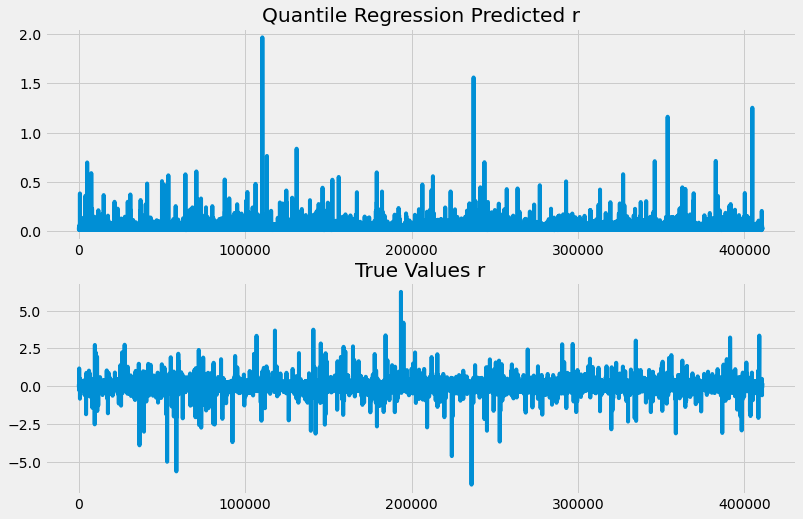

In [ ]:
fig, (ax3, ax4) = plt.subplots(nrows = 2, ncols = 1)
ax3.plot(pred_y, label = 'Quantile Regression Predicted r')
ax4.plot(y_test[targ_col_r].values, label = 'True r')
ax3.set_title('Quantile Regression Predicted r')
ax4.set_title('True Values r')


In [ ]:
# lets see how variation looks for .75 quantile
res2 = model.fit(q=0.15)
pred_y2 = res2.predict(sm.tools.tools.add_constant(X_test[feat_col_A].values))

Text(0.5, 1.0, 'True Values r')

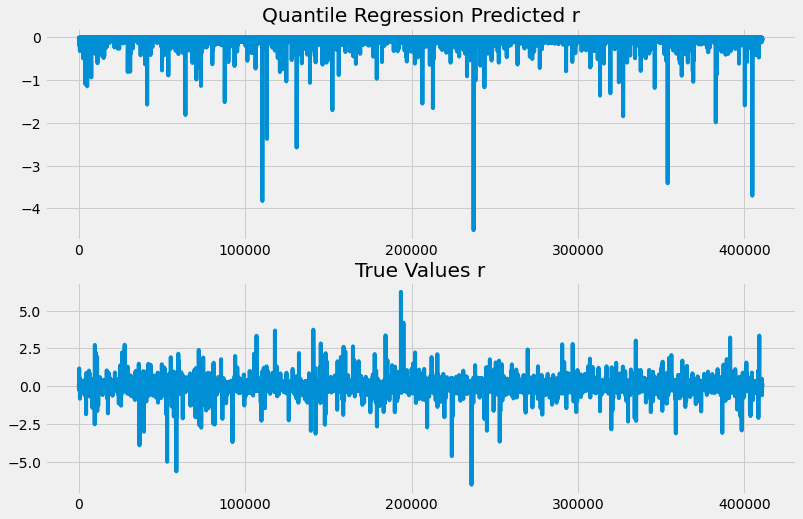

In [ ]:
fig, (ax5, ax6) = plt.subplots(nrows = 2, ncols = 1)
ax5.plot(pred_y2, label = 'Quantile Regression Predicted r')
ax6.plot(y_test[targ_col_r].values, label = 'True r')
ax5.set_title('Quantile Regression Predicted r')
ax6.set_title('True Values r')


In [ ]:
#We can clearly see that depending on the quantile we choose we can predict extreme values with more accuracy
# which woudn't be possible with linear regression

#PART- A





In [ ]:
X_train[feat_col_A].columns[6]

'lsvt_1'

In [ ]:
# Results from the paper, although it didnt came as exactly same but it conveys the ideas

mod = QuantReg(endog = y_train[targ_col_r].values, exog = sm.tools.tools.add_constant(X_train[feat_col_A].values))
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params[0], res.params[7], res.params[8], res.params[9]]


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "lsvt_1", "lsvt_2", "lsvt_3"])

print(models)

      q         a    lsvt_1    lsvt_2    lsvt_3
0  0.01  0.732578 -0.011768 -0.005991 -0.019992
1  0.05  0.316801 -0.006222 -0.003350 -0.007447
2  0.10  0.229140 -0.005545 -0.002296 -0.004536
3  0.25  0.115060 -0.003007 -0.001231 -0.001985
4  0.50  0.007114 -0.000300  0.000032 -0.000064
5  0.75 -0.091095  0.002245  0.000810  0.002033
6  0.95 -0.321152  0.007443  0.001850  0.008010
7  0.90 -0.223922  0.005180  0.001964  0.005021
8  0.99 -0.778493  0.014332  0.002710  0.023006


In [ ]:
X_train[feat_col_B].columns[6]

'lfvt_1'

In [ ]:
# Results from the paper, although it didnt came as exactly same but it conveys the ideas

mod2 = QuantReg(endog = y_train[targ_col_r].values, exog = sm.tools.tools.add_constant(X_train[feat_col_B].values))
def fit_model(q):
    res = mod2.fit(q=q)
    return [q, res.params[0], res.params[7], res.params[8], res.params[9]]


models2 = [fit_model(x) for x in quantiles]
models2 = pd.DataFrame(models2, columns=["q", "a", "lfvt_1", "lfvt_2", "lfvt_3"])

print(models2)

      q         a    lfvt_1    lfvt_2    lfvt_3
0  0.01  0.177728 -0.004313 -0.001996 -0.005468
1  0.05  0.088800 -0.002490 -0.001414 -0.002387
2  0.10  0.066527 -0.001956 -0.001157 -0.001616
3  0.25  0.032874 -0.001188 -0.000649 -0.000518
4  0.50  0.002753 -0.000052 -0.000129  0.000057
5  0.75 -0.026991  0.000950  0.000380  0.000736
6  0.95 -0.081233  0.002330  0.001306  0.002431
7  0.90 -0.059562  0.001938  0.000905  0.001599
8  0.99 -0.131850  0.002285  0.001938  0.005745


In [ ]:
# Results from the paper, although it didnt came as exactly same but it conveys the ideas

mod3 = QuantReg(endog = y_train[targ_col_r].values, exog = sm.tools.tools.add_constant(X_train[feat_col_C].values))
def fit_model(q):
    res = mod3.fit(q=q)
    return [q, res.params[0], res.params[7], res.params[8], res.params[9]]


models3 = [fit_model(x) for x in quantiles]
models3 = pd.DataFrame(models3, columns=["q", "a", "fst_1", "fst_2", "fst_3"])

print(models3)

      q         a     fst_1     fst_2     fst_3
0  0.01 -0.086526 -0.002225  0.000098 -0.002692
1  0.05 -0.052202 -0.001497 -0.000527 -0.001123
2  0.10 -0.039368 -0.001126 -0.000557 -0.000708
3  0.25 -0.020048 -0.000685 -0.000323 -0.000048
4  0.50 -0.000033 -0.000008 -0.000117  0.000078
5  0.75  0.019328  0.000512  0.000126  0.000355
6  0.95  0.054505  0.001071  0.000634  0.001053
7  0.90  0.040045  0.001055  0.000361  0.000679
8  0.99  0.091600 -0.000438  0.000497  0.003113


In [ ]:
feat_col_D[3]

'divt_1'

In [ ]:
# Results from the paper, although it didnt came as exactly same but it conveys the ideas

mod4 = QuantReg(endog = y_train[targ_col_div].values, exog = sm.tools.tools.add_constant(X_train[feat_col_D].values))
def fit_model(q):
    res = mod4.fit(q=q)
    return [q, res.params[0], res.params[4], res.params[5], res.params[6], res.params[7], res.params[8], res.params[9]]


models4 = [fit_model(x) for x in quantiles]
models4 = pd.DataFrame(models4, columns=["q", "a", "divt_1", "divt_2", "divt_3", "lsvt_1", "lsvt_2", "lsvt_3"])

print(models4)

      q         a    divt_1    divt_2    divt_3    lsvt_1    lsvt_2    lsvt_3
0  0.01  1.469806 -0.661299 -0.439286 -0.231154 -0.087267 -0.032048 -0.068009
1  0.05 -0.013430 -0.642885 -0.422689 -0.223063 -0.021278 -0.001473 -0.051576
2  0.10 -0.448196 -0.629253 -0.411722 -0.218109 -0.001988  0.002819 -0.037251
3  0.25 -0.174292 -0.609311 -0.391481 -0.205041  0.005977 -0.010470 -0.017936
4  0.50 -0.070977 -0.582961 -0.367205 -0.187380  0.004562 -0.007473  0.001842
5  0.75  0.141654 -0.556499 -0.342736 -0.171129  0.017333 -0.013415  0.014337
6  0.95 -1.759539 -0.514899 -0.317069 -0.151538  0.088526  0.023558  0.053637
7  0.90 -0.371579 -0.534409 -0.332738 -0.162818  0.038184  0.005008  0.032195
8  0.99 -6.311830 -0.460251 -0.287944 -0.137329  0.304695  0.004590  0.142567


In [ ]:
# Results from the paper, although it didnt came as exactly same but it conveys the ideas

mod5 = QuantReg(endog = y_train[targ_col_div].values, exog = sm.tools.tools.add_constant(X_train[feat_col_E].values))
def fit_model(q):
    res = mod5.fit(q=q)
    return [q, res.params[0], res.params[4], res.params[5], res.params[6], res.params[7], res.params[8], res.params[9]]


models5 = [fit_model(x) for x in quantiles]
models5 = pd.DataFrame(models5, columns=["q", "a", "divt_1", "divt_2", "divt_3", "lfvt_1", "lfvt_2", "lfvt_3"])

print(models5)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


      q         a    divt_1    divt_2    divt_3    lfvt_1    lfvt_2    lfvt_3
0  0.01 -8.073144 -0.660550 -0.436749 -0.227556  0.106846  0.075240  0.056143
1  0.05 -4.455074 -0.644698 -0.423176 -0.222884  0.056095  0.037460  0.028893
2  0.10 -3.254673 -0.630649 -0.412185 -0.217246  0.038587  0.026194  0.022653
3  0.25 -1.670430 -0.609872 -0.392183 -0.204979  0.016930  0.014656  0.012161
4  0.50 -0.464500 -0.583043 -0.367154 -0.187649  0.005121  0.005177  0.005724
5  0.75  0.887941 -0.557014 -0.343058 -0.171252 -0.011611 -0.004871  0.001378
6  0.95  3.579657 -0.513129 -0.312050 -0.149234 -0.039099 -0.037052  0.001307
7  0.90  2.355649 -0.532141 -0.329737 -0.160475 -0.032148 -0.017775  0.003190
8  0.99  8.510152 -0.460956 -0.285969 -0.128157 -0.111547 -0.089704 -0.015392


In [ ]:
# Results from the paper, although it didnt came as exactly same but it conveys the ideas

mod6 = QuantReg(endog = y_train[targ_col_div].values, exog = sm.tools.tools.add_constant(X_train[feat_col_F].values))
def fit_model(q):
    res = mod6.fit(q=q)
    return [q, res.params[0], res.params[4], res.params[5], res.params[6], res.params[7], res.params[8], res.params[9]]


models6 = [fit_model(x) for x in quantiles]
models6 = pd.DataFrame(models6, columns=["q", "a", "divt_1", "divt_2", "divt_3", "fst_1", "fst_2", "fst_3"])

print(models6)

      q         a    divt_1    divt_2    divt_3     fst_1     fst_2     fst_3
0  0.01 -2.959321 -0.662705 -0.435206 -0.227757  0.140460  0.101912  0.084836
1  0.05 -1.829535 -0.646047 -0.423185 -0.222618  0.073771  0.051256  0.044440
2  0.10 -1.370942 -0.630548 -0.411945 -0.217273  0.047381  0.035099  0.034275
3  0.25 -0.728865 -0.610431 -0.392149 -0.204780  0.021378  0.019660  0.018098
4  0.50 -0.116991 -0.583194 -0.367318 -0.187701  0.005812  0.007001  0.006641
5  0.75  0.567071 -0.556766 -0.343026 -0.171301 -0.016121 -0.005307 -0.002082
6  0.95  2.030631 -0.515284 -0.314671 -0.150044 -0.071611 -0.055219 -0.022069
7  0.90  1.365908 -0.533015 -0.331068 -0.161929 -0.047042 -0.025611 -0.006124
8  0.99  4.043200 -0.460947 -0.287880 -0.135541 -0.225590 -0.132416 -0.081487


In [ ]:
dff.columns

Index(['Dates', 'Time', 'k200', 'k200_wn', 'f_wn', 'iv2', 't_T', 'r', 'lsv',
       'lfv', 'div'],
      dtype='object')

#Part - C [Forecasting]

In [ ]:
df_forecast = dff_check[['k200', 'lsv', 'lfv', 'div']]

In [ ]:
targ = ['k200']
feat = ['lsv', 'lfv', 'div']

In [ ]:
df_forecast.isnull().sum()

k200    0
lsv     0
lfv     0
div     0
dtype: int64

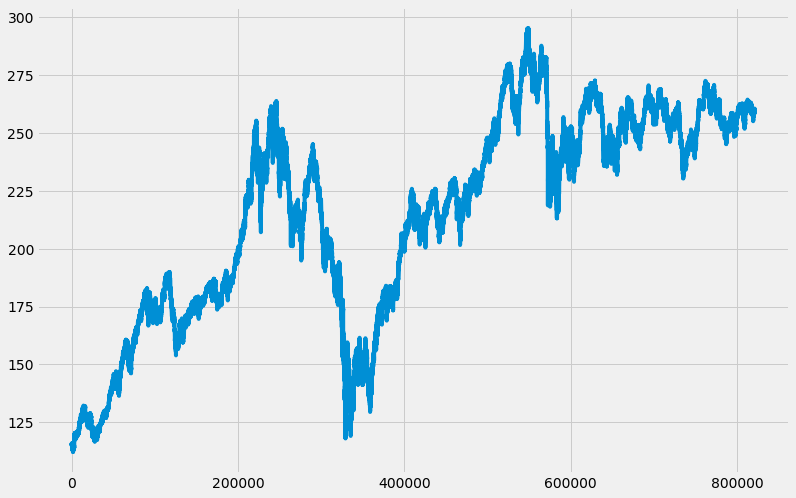

In [ ]:
plt.plot(df_forecast['k200'])

In [ ]:
train_data = df_forecast[:int(len(df_forecast)/2)]

test_data = df_forecast[int(len(df_forecast)/2):]

In [ ]:
#sm.tools.tools.add_constant because this model requres a feature having 1 as constant values

forc_model = QuantReg(endog = train_data[targ].values, exog = sm.tools.tools.add_constant(train_data[feat].values))

In [ ]:
# lets see how variation looks for .75 quantile
reslt = forc_model.fit(q=0.5)


In [ ]:
prediction = reslt.predict(sm.tools.tools.add_constant(test_data[feat].values))

In [ ]:
test_data.reset_index(inplace=True)

In [ ]:
print(test_data['k200'][0])
print(prediction[0])
print(len(test_data))
print(len(prediction))

223.28
191.66364293840235
410748
410748


In [ ]:
test_data['k200'].std()

19.199867803551008

In [ ]:
def buy_sell(test_data, prediction):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(test_data)):

      if (prediction[i] - test_data['k200'][i])>1:
          if position == False :
              signalBuy.append(test_data['k200'][i])
              signalSell.append(np.nan)
              position = True
          else:
              signalBuy.append(np.nan)
              signalSell.append(np.nan)
      elif (prediction[i] - test_data['k200'][i])<1:
          if position == True:
              signalBuy.append(np.nan)
              signalSell.append(test_data['k200'][i])
              position = False
          else:
              signalBuy.append(np.nan)
              signalSell.append(np.nan)
      else:
          signalBuy.append(np.nan)
          signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [ ]:
test_data['Buy_Signal_price'], test_data['Sell_Signal_price'] = buy_sell(test_data, prediction)
test_data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,k200,lsv,lfv,div,Buy_Signal_price,Sell_Signal_price
0,410997,223.28,23.185534,23.912997,1.724039,NaN,NaN
1,410998,223.25,23.026892,24.427267,-1.930057,NaN,NaN
2,410999,223.33,22.955914,24.677080,-1.214311,NaN,NaN
3,411000,223.19,22.856015,24.706637,6.869850,NaN,NaN
4,411001,223.16,22.996598,25.606068,-3.838683,NaN,NaN
...,...,...,...,...,...,...,...
410743,821782,259.63,23.236974,22.797849,0.084025,NaN,NaN
410744,821783,259.74,23.218085,24.550378,0.693092,NaN,NaN
410745,821784,259.80,23.312958,24.685934,-0.808555,NaN,NaN
410746,821785,259.84,23.096407,23.175673,-0.314433,NaN,NaN


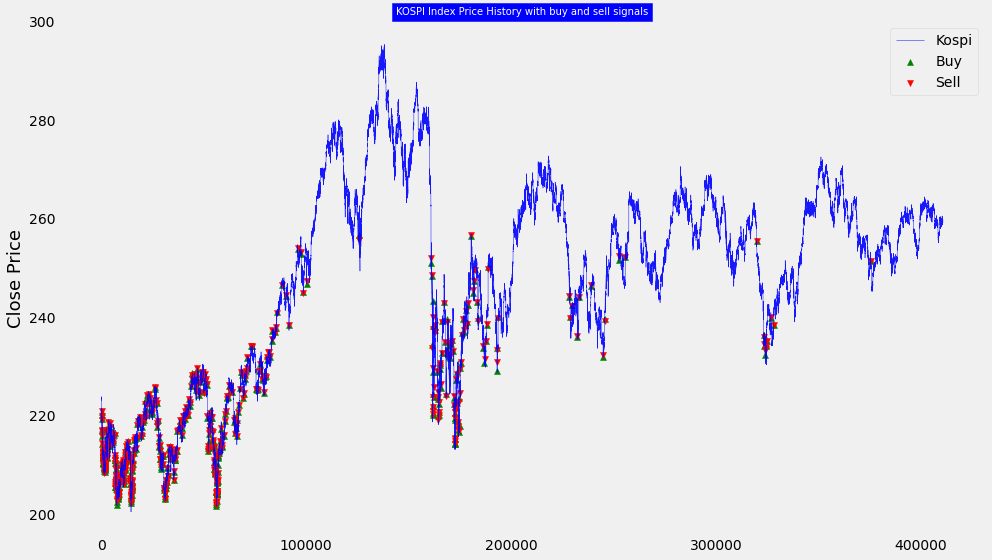

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(test_data['k200'] , label = 'Kospi' ,linewidth=0.5, color='blue', alpha = 0.9)
ax.scatter(test_data.index , test_data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(test_data.index , test_data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title('KOSPI Index' + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')

ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()
